# Predicción de COVID

In [ ]:
!pip install matplotlib

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Covid Data.csv')

# Analisis Explorativo

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [ ]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [ ]:
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [ ]:
df.nunique()

USMER                     2
MEDICAL_UNIT             13
SEX                       2
PATIENT_TYPE              2
DATE_DIED               401
INTUBED                   4
PNEUMONIA                 3
AGE                     121
PREGNANT                  4
DIABETES                  3
COPD                      3
ASTHMA                    3
INMSUPR                   3
HIPERTENSION              3
OTHER_DISEASE             3
CARDIOVASCULAR            3
OBESITY                   3
RENAL_CHRONIC             3
TOBACCO                   3
CLASIFFICATION_FINAL      7
ICU                       4
dtype: int64

Existen filas con valor de 97. 1 significa "si" y 2 significa "no". Mientras que los valores 97 and 99 son datos faltantes segun la descripción del dataset. Planteando una visualización se observa como se vería en una de las columnas

# Análisis Exploratorio de los Datos

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


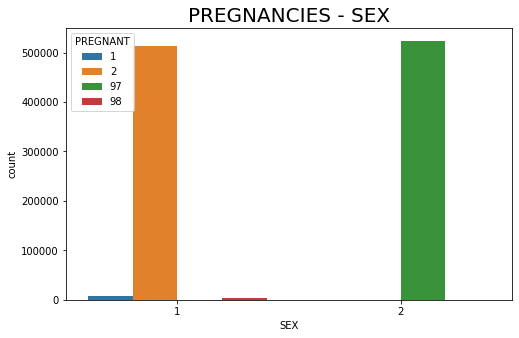

In [ ]:
plt.figure(figsize = (8,5))
ax = sns.countplot(df.SEX, hue = df.PREGNANT)
plt.title("PREGNANCIES - SEX", fontsize = 20);

En esta columna el valor de embarazos tiene datos desconocidos pero además el sexo masculino no tiene posibilidad de embarazo por lo que se harán los ajustes necesarios, en este caso, convertir de 97 a 2.

In [4]:
df.PREGNANT = df.PREGNANT.replace(98, 2)
df.PREGNANT = df.PREGNANT.replace(97, 2)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'HOSPITALIZED - INTUBED')

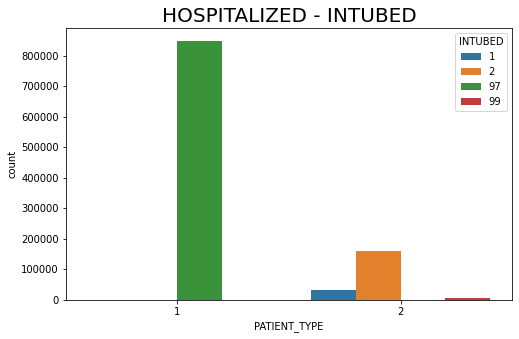

In [ ]:
plt.figure(figsize = (8,5))
ax = sns.countplot(df.PATIENT_TYPE, hue = df.INTUBED)
plt.title("HOSPITALIZED - INTUBED", fontsize = 20)

El tipo de paciente tiene demasiados valores nulos por lo que es mejor eliminar la columna. Igualmente la columna de ICU, pacientes intubados, tiene muchos valores nulos y se eliminará igualmente.

In [5]:
df.drop("INTUBED", axis = 1, inplace = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f456563faf0>]],
      dtype=object)

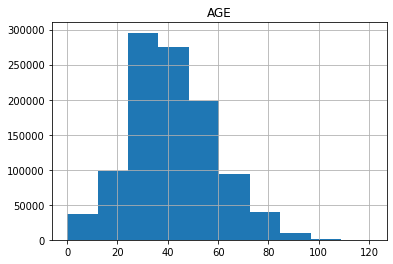

In [ ]:
df.hist(column='AGE')

Observamos los valores de la variable clasificadora

In [7]:
df.CLASIFFICATION_FINAL.value_counts()

7    499250
3    381527
6    128133
5     26091
1      8601
4      3122
2      1851
Name: CLASIFFICATION_FINAL, dtype: int64

En la descripción del dataset se nos indica que los valores 1, 2 y 3 son COVID mientras que los valores 4, 5, 6, 7 son no Covid por lo que los convertiremos a binario para evitar redundancias

In [8]:
df.CLASIFFICATION_FINAL = df.CLASIFFICATION_FINAL.replace([1,2,3], 1)
df.CLASIFFICATION_FINAL = df.CLASIFFICATION_FINAL.replace([4,5,6,7], 2)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


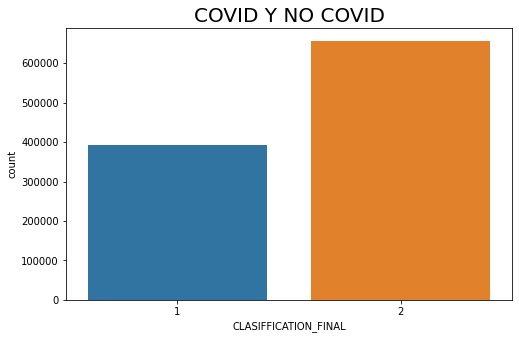

In [13]:
plt.figure(figsize = (8,5))
ax = sns.countplot(df.CLASIFFICATION_FINAL)
plt.title("COVID Y NO COVID", fontsize = 20);

Separamos la fecha en Año y Mes

In [9]:
df["MONTH"] = df.DATE_DIED.str.split("/", expand = True)[1]
df["YEAR"] = df.DATE_DIED.str.split("/", expand = True)[2]

In [ ]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,MONTH,YEAR
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,1,2,2,2,2,2,1,97,05,2020
1,2,1,2,1,03/06/2020,97,1,72,2,2,...,1,2,2,1,1,2,2,97,06,2020
2,2,1,2,2,09/06/2020,1,2,55,2,1,...,2,2,2,2,2,2,1,2,06,2020
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,97,06,2020
4,2,1,2,1,21/06/2020,97,2,68,2,1,...,1,2,2,2,2,2,1,97,06,2020


La siguiente gráfica de barras muestra las muertes por año. 
* En 2020 alrededor de 68000 people murieron de COVID y no estaban hospitalizadas. Mientras que 6600 murieron de COVID y estaban hospitalizadas
* En 2021 alrededor de 60 personas murieron de COVID y no estaban hospitalizadas. Mientras que 250 personas murieron de COVID y estaban hospitalizadas.

Text(0.5, 1.0, 'DEAD NUMBERS OF COVID BY YEAR')

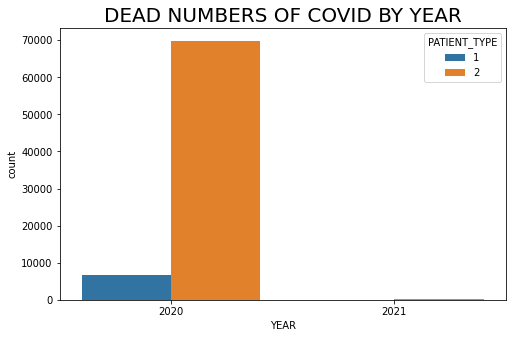

In [ ]:
plt.figure(figsize = (8,5))
ax = sns.countplot(x = "YEAR", hue = "PATIENT_TYPE", data = df)
plt.title("DEAD NUMBERS OF COVID BY YEAR", fontsize = 20)

Text(0.5, 1.0, 'DEAD NUMBERS OF COVID BY MONTH')

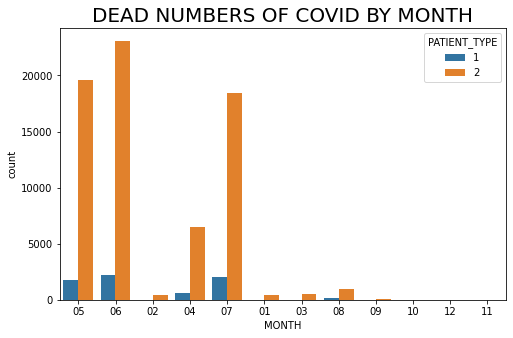

In [ ]:
plt.figure(figsize = (8,5))
ax = sns.countplot(x = "MONTH", hue = "PATIENT_TYPE", data = df)
plt.title("DEAD NUMBERS OF COVID BY MONTH", fontsize = 20)

Se borrarán las columnas de fechas 

In [10]:
df.drop(["DATE_DIED", "MONTH", "YEAR"], axis = 1, inplace = True)

In [11]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

2    662903
1    385672
Name: USMER, dtype: int64


12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: MEDICAL_UNIT, dtype: int64


1    525064
2    523511
Name: SEX, dtype: int64


1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64


2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64


30     27010
31     25927
28     25313
29     25134
34     24872
       ...  
114        2
116        2
111        1
121        1
113        1
Name: AGE, Length: 121, dtype: int64


2    1040444
1       8131
Name: PREGNANT, dtype: int64


2     920248
1     124989
98      3338
Name: DIABETES, dtype: int64


2     1030510
1       15062
98       3003
Name: COPD, dtype: int64


2     1014024
1       31572
98       2979
Name: ASTHMA, dtype: int64


2     1031001
1       14170
98       3404
Name: INMSUPR, dtype: int64


2     882742
1     162729
98      3104
Name

In [14]:
df.drop("ICU", axis = 1, inplace = True)

In [15]:
df["CLASIFFICATION_FINAL"] = df["CLASIFFICATION_FINAL"] - 1

# Entrenamiento de Modelo

Se obtienen las variables clasificadoras y la variable a clasificar 

In [17]:
X = df.drop("CLASIFFICATION_FINAL", axis = 1)
y = df["CLASIFFICATION_FINAL"]

Se hace la división de prueba y entrenamiento

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

Se tiene el siguiente código para hacer un método de ensamblaje

In [19]:
from sklearn.metrics import fbeta_score, accuracy_score
from time import time

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test):
    results = {}
    
    # Ajustar al alumno a los datos de entrenamiento usando cortes con 'sample_size'
    start = time() # Obtener hora de inicio
    learner = learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # Obtener hora de termino
    
    # Calcular el tiempo de entrenamiento
    results['train_time'] = end - start
        
    #  Get the predictions on the test set,
    #  then get predictions on the first 300 training samples
    start = time() # Obtener hora de inicio
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Obtener hora de termino
    
   # Calcular el tiempo total de predicción
    results['pred_time'] = end - start
            
    # Calcular la precisión en las primeras 300 muestras de entrenamiento
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
   # Calcular la precisión en el conjunto de prueba
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # Calcule la puntuación F en las primeras 300 muestras de entrenamiento
    results['f_train'] = fbeta_score(y_train[:300],predictions_train, beta = 0.5)
        
    # Calcule la puntuación F en el conjunto de prueba
    results['f_test'] = fbeta_score(y_test,predictions_test, beta= 0.5)
       
    # Éxito
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

Luego se escogen diferentes clasificadores para probar 

In [20]:
# Importe los tres modelos de aprendizaje supervisado de sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Inicialice los tres modelos, los estados aleatorios se establecen en 101 para que sepamos cómo reproducir el modelo más adelante
clf_A = DecisionTreeClassifier(random_state=101)
clf_B = BaggingClassifier(n_estimators=10, random_state=101)
clf_C = RandomForestClassifier(max_depth=2, random_state=101)
clf_D = GradientBoostingClassifier(random_state=101)
clf_E = AdaBoostClassifier(random_state = 101)
clf_F = LogisticRegression(random_state = 101)
clf_G = KNeighborsClassifier(n_neighbors = 3)

# Calcule el número de muestras para el 1 %, 10 % y 100 % de los datos de entrenamiento
samples_1 = int(round(len(X_train) / 100))
samples_10 = int(round(len(X_train) / 10))
#samples_100 = int(round(len(X_train) / 2))
samples_100 = len(X_train)
# Recopilar resultados sobre los estimadores
results = {}
for clf in [clf_A, clf_B, clf_C, clf_D, clf_E, clf_F, clf_G]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

DecisionTreeClassifier trained on 7340 samples.
DecisionTreeClassifier trained on 73400 samples.
DecisionTreeClassifier trained on 734002 samples.
BaggingClassifier trained on 7340 samples.
BaggingClassifier trained on 73400 samples.
BaggingClassifier trained on 734002 samples.
RandomForestClassifier trained on 7340 samples.
RandomForestClassifier trained on 73400 samples.
RandomForestClassifier trained on 734002 samples.
GradientBoostingClassifier trained on 7340 samples.
GradientBoostingClassifier trained on 73400 samples.
GradientBoostingClassifier trained on 734002 samples.
AdaBoostClassifier trained on 7340 samples.
AdaBoostClassifier trained on 73400 samples.
AdaBoostClassifier trained on 734002 samples.


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression trained on 7340 samples.


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression trained on 73400 samples.


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression trained on 734002 samples.
KNeighborsClassifier trained on 7340 samples.
KNeighborsClassifier trained on 73400 samples.
KNeighborsClassifier trained on 734002 samples.


In [21]:
# Imprimiendo los valores
for i in results.items():
    print(i[0])
    display(pd.DataFrame(i[1]).rename(columns={0:'1%', 1:'10%', 2:'100%'}))

DecisionTreeClassifier


,1%,10%,100%
train_time,0.026892,0.245834,3.919235
pred_time,0.098926,0.123446,0.166283
acc_train,0.850000,0.746667,0.723333
acc_test,0.590089,0.628770,0.651162
f_train,0.862231,0.780834,0.756442
f_test,0.669888,0.692263,0.703687


BaggingClassifier


,1%,10%,100%
train_time,0.147699,1.805600,39.597378
pred_time,0.954979,1.388562,2.053326
acc_train,0.840000,0.753333,0.723333
acc_test,0.608024,0.633284,0.653273
f_train,0.849315,0.779777,0.753871
f_test,0.682210,0.694028,0.703826


RandomForestClassifier


,1%,10%,100%
train_time,0.255884,1.708136,23.163478
pred_time,1.826837,1.835397,1.901632
acc_train,0.650000,0.653333,0.653333
acc_test,0.657367,0.657453,0.657898
f_train,0.705378,0.707584,0.707584
f_test,0.699530,0.699680,0.700095


GradientBoostingClassifier


,1%,10%,100%
train_time,0.541554,5.637660,87.762473
pred_time,0.550271,0.598845,0.603579
acc_train,0.663333,0.656667,0.666667
acc_test,0.666208,0.668335,0.668811
f_train,0.716599,0.712551,0.718928
f_test,0.710032,0.711362,0.711612


AdaBoostClassifier


,1%,10%,100%
train_time,0.274424,2.207100,33.417262
pred_time,3.022214,3.102984,3.138851
acc_train,0.646667,0.660000,0.660000
acc_test,0.665655,0.666999,0.667298
f_train,0.706742,0.714286,0.714286
f_test,0.709589,0.709589,0.710240


LogisticRegression


,1%,10%,100%
train_time,0.182821,1.828080,17.174512
pred_time,0.041325,0.035250,0.038141
acc_train,0.643333,0.643333,0.643333
acc_test,0.661560,0.661748,0.661738
f_train,0.704453,0.704971,0.704971
f_test,0.706270,0.706387,0.706659


KNeighborsClassifier


,1%,10%,100%
train_time,0.003255,0.008304,0.058436
pred_time,48.076169,364.431275,3967.107620
acc_train,0.806667,0.790000,0.793333
acc_test,0.592006,0.595070,0.596459
f_train,0.838991,0.830861,0.830890
f_test,0.671052,0.673683,0.674784


In [22]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}
tree = DecisionTreeClassifier()

In [23]:
from sklearn.model_selection import GridSearchCV
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [27]:
print("tuned hpyerparameters :(best parameters) ")
print(tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters) 
{'criterion': 'entropy', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
accuracy : 0.6664968259161805


In [30]:
df_importances = pd.DataFrame(list(X), tree_cv.best_estimator_.feature_importances_)
df_importances.columns = ["Feature_Names"]
df_importances["Importances"] = df_importances.index
df_importances = df_importances.sort_values(by = "Importances", ascending = False)
df_importances.index = np.arange(0,len(df_importances))

Text(0.5, 1.0, 'Feature Importances')

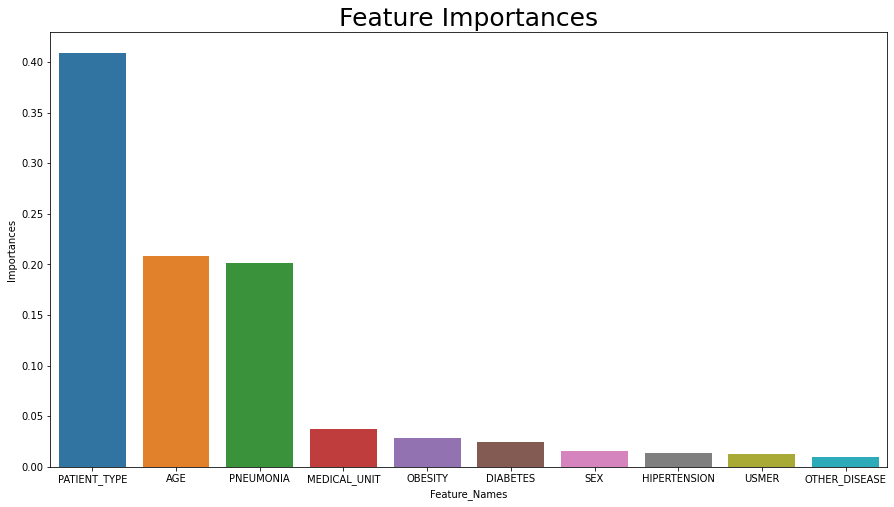

In [31]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x = "Feature_Names", y = "Importances", data = df_importances.sort_values(
    by = "Importances", ascending=False)[0:10])
plt.title("Feature Importances", fontsize = 25)